# Washington DC

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Reading merged bike datas for 2018
chicago_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/dc_merged_2018.csv")
# dc_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/dc_merged_2018.csv")
# nyc_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/nyc_merged_2018.csv")

In [4]:
chicago_2018.head()

,start_date,start_hour_range,start_station_name,trip_count,trip_duration_avg,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,01/01/2018,1am-6am,10th & E St NW,1,436,19,26,13,0.0,11.63,0.0
1,01/01/2018,1am-6am,10th & K St NW,1,202,19,26,13,0.0,11.63,0.0
2,01/01/2018,1am-6am,10th & U St NW,1,257,19,26,13,0.0,11.63,0.0
3,01/01/2018,1am-6am,11th & Girard St NW,1,621,19,26,13,0.0,11.63,0.0
4,01/01/2018,1am-6am,11th & Kenyon St NW,1,143,19,26,13,0.0,11.63,0.0


In [5]:
chicago_2018_gb = chicago_2018.groupby(["start_date"])
chicago_2018_agg =chicago_2018_gb.agg({"trip_count": "sum", "TAVG": "mean", "TMAX": "mean",
                                       "TMIN": "mean", "PRCP": "mean", "AWND": "mean", "SNWD": "mean"}) 
chicago_2018_agg.reset_index(level=["start_date"], inplace=True)
chicago_2018_agg.head()

,start_date,trip_count,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,01/01/2018,1213,19,26,13,0.0,11.63,0.0
1,01/02/2018,3792,18,26,13,0.0,7.83,0.0
2,01/03/2018,4748,23,35,13,0.0,3.80,0.0
3,01/04/2018,2368,26,27,16,0.1,19.91,1.2
4,01/05/2018,2709,17,21,13,0.0,15.66,1.2


In [6]:
chicago_2018_m = chicago_2018_agg.drop(["start_date", "trip_count"], axis=1)
chicago_2018_m.head()

,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,19,26,13,0.0,11.63,0.0
1,18,26,13,0.0,7.83,0.0
2,23,35,13,0.0,3.80,0.0
3,26,27,16,0.1,19.91,1.2
4,17,21,13,0.0,15.66,1.2


In [7]:
chicago_2018_X = pd.get_dummies(chicago_2018_m)
chicago_2018_X.columns

Index(['TAVG', 'TMAX', 'TMIN', 'PRCP', 'AWND', 'SNWD'], dtype='object')

In [8]:
chicago_2018_X.head()

,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,19,26,13,0.0,11.63,0.0
1,18,26,13,0.0,7.83,0.0
2,23,35,13,0.0,3.80,0.0
3,26,27,16,0.1,19.91,1.2
4,17,21,13,0.0,15.66,1.2


In [9]:
chicago_2018_Y = chicago_2018_agg["trip_count"].values.reshape(-1, 1)

In [10]:
print(chicago_2018_X.shape, chicago_2018_Y.shape)

(365, 6) (365, 1)


In [11]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(chicago_2018_X, chicago_2018_Y, random_state=42)


In [12]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler_chicago = StandardScaler().fit(X_train_ch)
y_scaler_chicago = StandardScaler().fit(y_train_ch)

In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled_ch =  X_scaler_chicago.transform(X_train_ch)
X_test_scaled_ch = X_scaler_chicago.transform(X_test_ch)
y_train_scaled_ch = y_scaler_chicago.transform(y_train_ch)
y_test_scaled_ch = y_scaler_chicago.transform(y_test_ch)

In [14]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression

model_ch = LinearRegression()
model_ch.fit(X_train_scaled_ch, y_train_scaled_ch)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

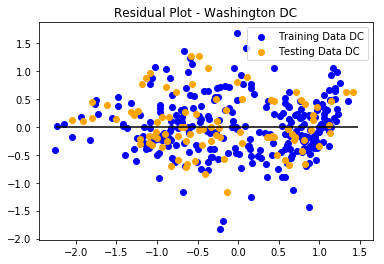

In [15]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions_ch = model_ch.predict(X_test_scaled_ch)
model_ch.fit(X_train_scaled_ch, y_train_scaled_ch)

plt.scatter(model_ch.predict(X_train_scaled_ch), model_ch.predict(X_train_scaled_ch) - y_train_scaled_ch, c="blue", label="Training Data DC")
plt.scatter(model_ch.predict(X_test_scaled_ch), model_ch.predict(X_test_scaled_ch) - y_test_scaled_ch, c="orange", label="Testing Data DC")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled_ch.min(), xmax=y_test_scaled_ch.max())
plt.title("Residual Plot - Washington DC")

plt.savefig("residual_dc.png", bbox_inches="tight")

In [16]:
print('Weight coefficients: ', model_ch.coef_)
print('y-axis intercept: ', model_ch.intercept_) 

Weight coefficients:  [[ 2.30913442e-02  9.38003581e-01 -1.62138701e-01 -3.27533040e-01
   1.32695467e-02  3.76612859e-04]]
y-axis intercept:  [2.25461157e-16]


In [17]:
print(f"True output: {y_test_scaled_ch[10]}")
print(f"Predicted output: {predictions_ch[10]}")
print(f"Prediction Error: {predictions_ch[10] - y_test_scaled_ch[10]}")
print(f"Prediction Error %: {(predictions_ch[10] - y_test_scaled_ch[10]) / y_test_scaled_ch[10] * 100}")

True output: [-0.89702358]
Predicted output: [-1.20758389]
Prediction Error: [-0.3105603]
Prediction Error %: [34.62119711]


In [18]:
print(f"True output: {y_test_scaled_ch[42]}")
print(f"Predicted output: {predictions_ch[42]}")
print(f"Prediction Error: {predictions_ch[42] - y_test_scaled_ch[42]}")
print(f"Prediction Error %: {(predictions_ch[42] - y_test_scaled_ch[42]) / y_test_scaled_ch[42] * 100}")

True output: [-0.92736975]
Predicted output: [-1.09299154]
Prediction Error: [-0.16562178]
Prediction Error %: [17.8593042]


In [28]:
print(f"True output: {y_test_scaled_ch[11]}")
print(f"Predicted output: {predictions_ch[11]}")
print(f"Prediction Error: {predictions_ch[11] - y_test_scaled_ch[11]}")
print(f"Prediction Error %: {(predictions_ch[11] - y_test_scaled_ch[11]) / y_test_scaled_ch[11] * 100}")

True output: [-0.76773362]
Predicted output: [-0.89795937]
Prediction Error: [-0.13022575]
Prediction Error %: [16.96236187]


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted_ch = model_ch.predict(X_test_scaled_ch)

# Score the prediction with mse and r2
mse_ch = mean_squared_error(y_test_scaled_ch, predicted_ch)
r2_ch = r2_score(y_test_scaled_ch, predicted_ch)

print(f"Mean Squared Error (MSE) - Washington DC: {mse_ch}")
print(f"R-squared (R2 ) - Washington DC: {r2_ch}")

Mean Squared Error (MSE) - Washington DC: 0.22957469333882302
R-squared (R2 ) - Washington DC: 0.7623742023430067


In [21]:
model_ch.score(X_test_scaled_ch, y_test_scaled_ch)

0.7623742023430067

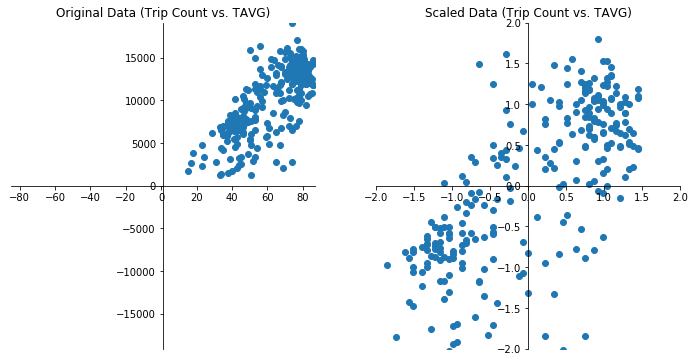

In [22]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data (Trip Count vs. TAVG)")
axes2.set_title("Scaled Data (Trip Count vs. TAVG)")

maxx = X_train_ch["TAVG"].max()
maxy = y_train_ch.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train_ch["TAVG"], y_train_ch)
axes2.scatter(X_train_scaled_ch[:,0], y_train_scaled_ch[:])

plt.savefig("scaled_dc.png", bbox_inches="tight")